## Opis problema
U ovom projektu se koristi algoritam simulirano kaljenje za optimizaciju rasporeda predavanja i vježbi na temelju broja konflikta između vremena i prostora. Svrha je da minimizira broj konflikta između predavanja koja se preklapaju u vremenu i koriste istu učionicu.

## Instalacija potrebnih biblioteka

In [28]:
!pip install matplotlib numpy


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Parametri
- **Početna temperatura**: 1000
- **Brzina hlađenja**: 0.95
- **Zaustavna temperatura**: 1

**Predmeti i sati**:
- Poslovna inteligencija (predavanje) - 1 sat
- Statistika (vježbe) - 1 sat
- ...

**Sljedeći su dostupni slotovi i sobe**:
- Vremenski slotovi: 08:00-09:00, 09:00-10:00, ...
- Sale: 2113, 3202, 3203, ...

In [30]:
# Parametri za simulirano kaljenje
pocetna_temperatura = 1000
stopa_hlađenja = 0.95
temperatura_prestanak = 1

# Parametri problema
predmeti = {
    "Poslovna inteligencija (predavanje)": 1,
    "Poslovna inteligencija (vježbe)": 1,
    "Statistika (predavanje)": 1,
    "Statistika (vježbe)": 1,
    "Primjena numeričkih metoda u SI (predavanje)": 1,
    "Primjena numeričkih metoda u SI (vježbe)": 1,
    "Vještačka inteligencija (predavanje)": 1,
    "Vještačka inteligencija (vježbe)": 1
}

sale = ["2113", "3202", "3203", "3204", "2113"]  # Dostupne sale
vrijeme_slotovi = ["08:00-09:00", "09:00-10:00", "10:00-11:00", "11:00-12:00", "12:00-13:00"]  # Slotovi za predavanja i vježbe

## Funkcija za generisanje rasporeda
Funkcija `generisi_raspored()` slučajno generira raspored na temelju predmeta, slota i sobe. Za svaki predmet, dodaje se broj sati u raspored i nasumično dodjeljuje slot i soba za svaki čas.

In [31]:
# Funkcija za generisanje rasporeda
def generisi_raspored():
    raspored = {}
    for predmet, sati in predmeti.items():
        for sat in range(sati):
            kljuc_rasporeda = f"{predmet}_{sat + 1}"
            raspored[kljuc_rasporeda] = {
                "slot": random.choice(vrijeme_slotovi),
                "soba": random.choice(sale)
            }
    return raspored

## Simulirano kaljenje
Simulirano kaljenje je algoritam koji pokušava minimizirati broj konflikta između predavanja kroz iteracije. Algoritam omogućava povremeno prihvatanje lošijih rješenja kako bi izbjegao lokalna optimuma i potencijalno pronašao bolje globalno rješenje. U svakoj iteraciji, temperatura se smanjuje kako bi se smanjila vjerovatnost prihvatanja lošijih rješenja.

In [32]:
# Funkcija za računanje konflikta
def izracunaj_konflikte(raspored):
    konflikti = 0
    mapa_vrijeme_soba = {}
    for c, detalji in raspored.items():
        kljuc = (detalji["slot"], detalji["soba"])
        if kljuc in mapa_vrijeme_soba:
            konflikti += 1  # Konflikt zbog iste sobe i vremena
        else:
            mapa_vrijeme_soba[kljuc] = c
    return konflikti

In [33]:
# Funkcija za perturbaciju rasporeda
def perturbiraj_raspored(raspored):
    novi_raspored = raspored.copy()
    predmet_za_promjenu = random.choice(list(raspored.keys()))
    novi_raspored[predmet_za_promjenu] = {
        "slot": random.choice(vrijeme_slotovi),
        "soba": random.choice(sale)
    }
    return novi_raspored

In [34]:
# Simulirano kaljenje
def simulirano_kaljenje():
    trenutni_raspored = generisi_raspored()
    trenutni_konflikti = izracunaj_konflikte(trenutni_raspored)
    temperatura = pocetna_temperatura
    najbolji_raspored = trenutni_raspored
    najbolji_konflikti = trenutni_konflikti

    iteracije = 0
    historija_konflikta = []

    while temperatura > temperatura_prestanak:
        novi_raspored = perturbiraj_raspored(trenutni_raspored)
        novi_konflikti = izracunaj_konflikte(novi_raspored)
        
        # Prihvatanje boljeg rješenja ili lošijeg uz određenu vjerovatnoću
        if novi_konflikti < trenutni_konflikti or \
           np.exp((trenutni_konflikti - novi_konflikti) / temperatura) > random.random():
            trenutni_raspored = novi_raspored
            trenutni_konflikti = novi_konflikti

            # Ažuriranje najboljeg rješenja
            if novi_konflikti < najbolji_konflikti:
                najbolji_raspored = novi_raspored
                najbolji_konflikti = novi_konflikti

        historija_konflikta.append(trenutni_konflikti)
        temperatura *= stopa_hlađenja
        iteracije += 1

    return najbolji_raspored, najbolji_konflikti, historija_konflikta, iteracije

In [35]:
najbolji_raspored, najbolji_konflikti, historija_konflikta, iteracije = simulirano_kaljenje()

# Ispis rezultata
print("Najbolji raspored:")
for c, detalji in najbolji_raspored.items():
    print(f"{c}: {detalji['slot']} u {detalji['soba']}")
print(f"\nMinimalni konflikti: {najbolji_konflikti}")
print(f"Ukupno iteracija: {iteracije}")

Najbolji raspored:
Poslovna inteligencija (predavanje)_1: 09:00-10:00 u 3203
Poslovna inteligencija (vježbe)_1: 08:00-09:00 u 2113
Statistika (predavanje)_1: 10:00-11:00 u 2113
Statistika (vježbe)_1: 08:00-09:00 u 3203
Primjena numeričkih metoda u SI (predavanje)_1: 12:00-13:00 u 3203
Primjena numeričkih metoda u SI (vježbe)_1: 09:00-10:00 u 3202
Vještačka inteligencija (predavanje)_1: 10:00-11:00 u 3203
Vještačka inteligencija (vježbe)_1: 09:00-10:00 u 2113

Minimalni konflikti: 0
Ukupno iteracija: 135


## Vizualizacija konvergencije
Sljedeći grafikon prikazuje kako broj konflikta opada tokom simuliranog kaljenja. To nam pokazuje kako algoritam postupno optimizira raspored.

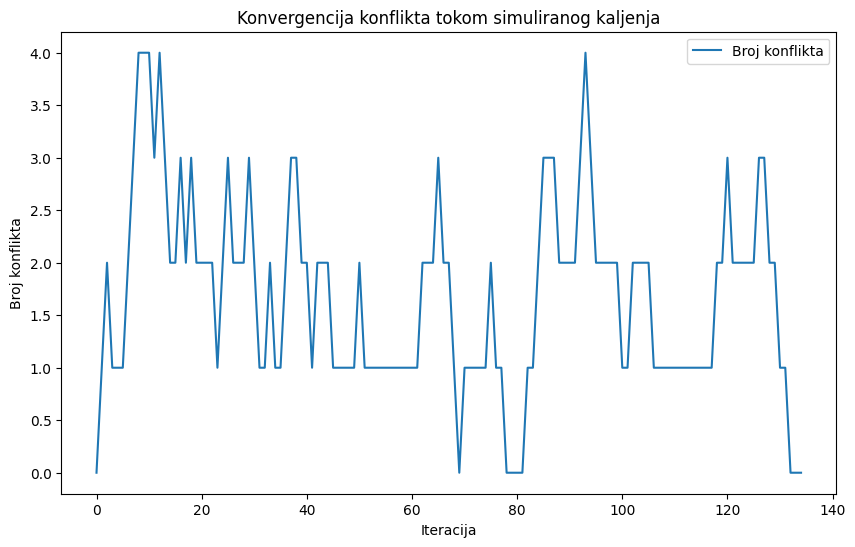

In [36]:
# Vizualizacija konvergencije
plt.figure(figsize=(10, 6))
plt.plot(historija_konflikta, label="Broj konflikta")
plt.title("Konvergencija konflikta tokom simuliranog kaljenja")
plt.xlabel("Iteracija")
plt.ylabel("Broj konflikta")
plt.legend()
plt.show()